In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [3]:
data = pd.read_csv('petrol_consumption.csv')
data = data.sort_values(by='Petrol_Consumption')
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
6,8.00,5319,11868,0.451,344
4,8.00,4399,431,0.544,410
3,7.50,4870,2351,0.529,414
5,10.00,5342,1333,0.571,457
24,8.50,4574,2619,0.551,460
8,8.00,4447,8577,0.529,464
22,9.00,4897,2449,0.511,464
7,8.00,5126,2138,0.553,467
11,7.50,5126,14186,0.525,471
34,8.00,3528,3495,0.487,487


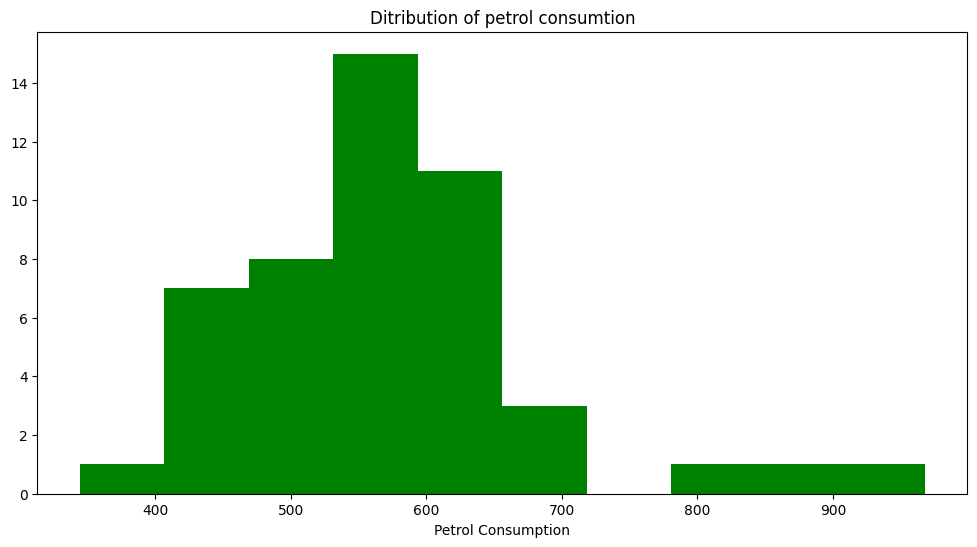

In [4]:
plt.figure(figsize = (12, 6))
plt.hist(data['Petrol_Consumption'], color='green', bins = 10)
plt.xlabel('Petrol Consumption')
plt.title(label = 'Ditribution of petrol consumtion', color = 'black')
plt.show()

In [5]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


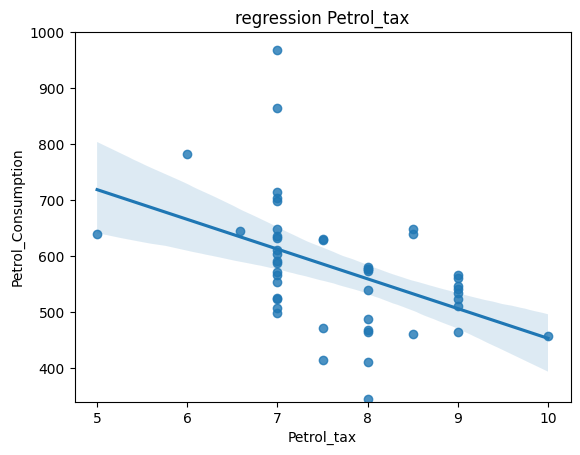

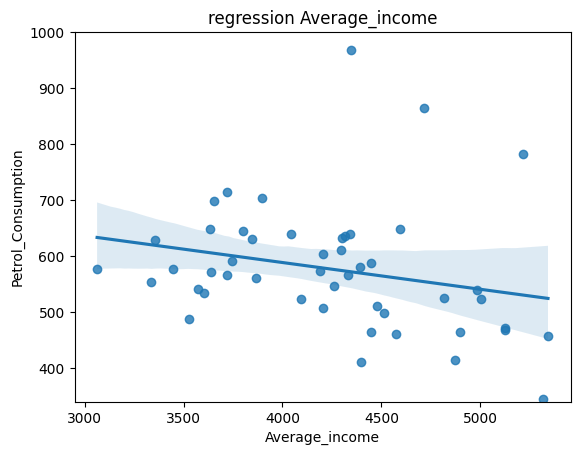

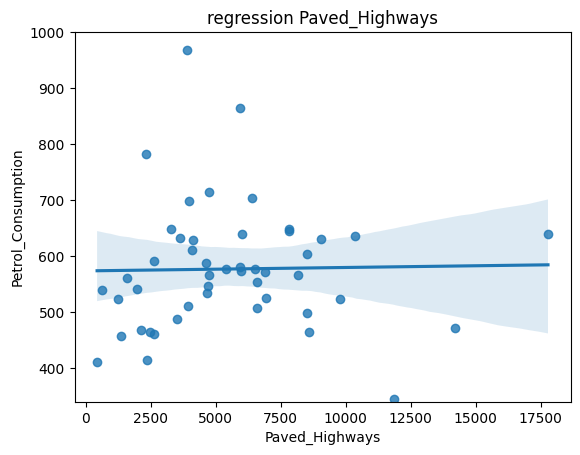

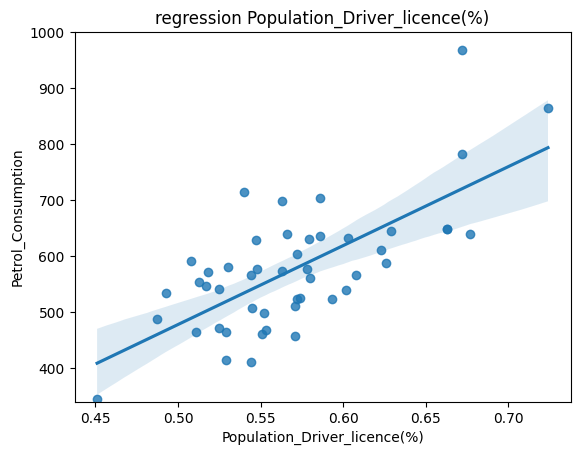

In [6]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for i in variables:
    plt.figure()
    sb.regplot(x = i, y = 'Petrol_Consumption', data = data).set(title = f"regression {i}")
    plt.ylim(340, 1000)


In [7]:
 corr = data.corr()

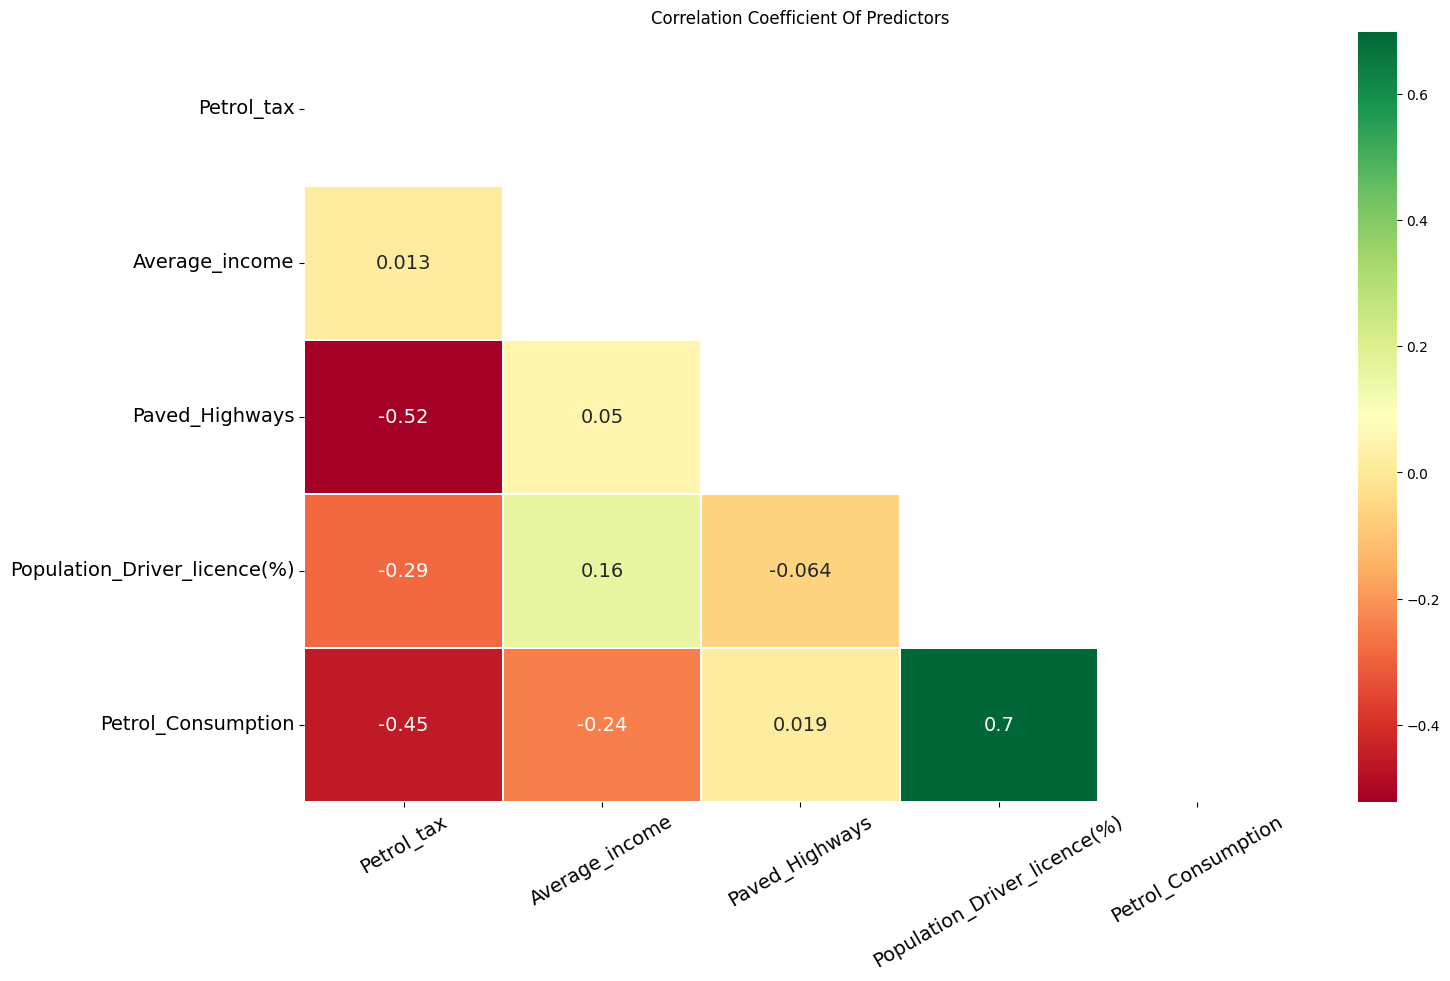

In [8]:
plt.figure(figsize = (16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = sb.heatmap(corr, cmap='RdYlGn', mask = mask, linewidths=0.30, annot = True, annot_kws = {'size' : 14})
fig.set_xticklabels(fig.get_xticklabels(), rotation = 30)
plt.title('Correlation Coefficient Of Predictors')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [9]:
# Multicollinearity
vif_data = pd.DataFrame()
X = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
vif_data["feature"] = X.columns
vif_data["VIF"] = [vif(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Petrol_tax,43.065190
1,Average_income,56.796847
2,Paved_Highways,3.887821
3,Population_Driver_licence(%),57.390664


In [10]:
y = data['Petrol_Consumption']
x = data[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]

In [11]:
SEED = 48
x_train, x_test, y_train, y_test = TTS(x, y, test_size = 0.2, random_state = SEED)

In [12]:
model = LR()

In [13]:
model.fit(x_train, y_train)

LinearRegression()

In [14]:
model.intercept_

54.56740505919436

In [15]:
model.coef_

array([-8.03609475e-02,  2.09068226e-04,  1.51694641e+03])

In [16]:
y_pred = model.predict(x_test)
y_pred

array([655.35432862, 491.73431339, 526.36855422, 593.68509157,
       591.81669354, 768.87532233, 510.537579  , 544.60036308,
       497.63147996, 549.27541435])

In [17]:
result = pd.DataFrame({'actual' : y_test, 'predict' : y_pred})
result

,actual,predict
44,782,655.354329
5,457,491.734313
4,410,526.368554
1,524,593.685092
36,640,591.816694
38,648,768.875322
34,487,510.537579
13,508,544.600363
23,547,497.631480
30,571,549.275414


In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae, mse, rmse

(64.7723307142764, 5737.853817189987, 75.74862254318548)

In [19]:
coeff_determ_1 = model.score(x_test, y_test)
coeff_determ_1

0.459144089533824

In [20]:
coeff_determ_2 = model.score(x_train, y_train)
coeff_determ_2

0.6462178403765462

In [21]:
len(y_pred)

10

<AxesSubplot: xlabel='Petrol_Consumption'>

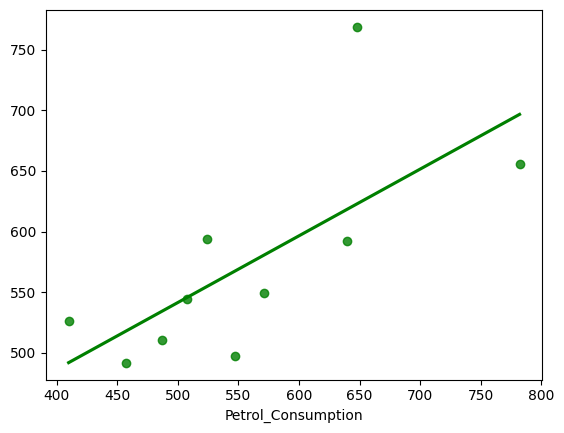

In [22]:
sb.regplot(x = y_test, y = y_pred, ci=None, color ='green')